In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [3]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_evaluation_returns, plot_grouped_evaluation_returns, plot_min_max_penalty

In [4]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [5]:
# No REx
MP329 = get_results("MP329")
MP330 = get_results("MP330")
MP331 = get_results("MP331")

# REx - 0.1
MP332 = get_results("MP332")
MP333 = get_results("MP333")
MP334 = get_results("MP334")

# REx - 1.0
MP335 = get_results("MP335")
MP336 = get_results("MP336")
MP337 = get_results("MP337")

# REx - 5.0
MP723 = get_results("MP723")
MP724 = get_results("MP724")
MP725 = get_results("MP725")

# REx - 10.0
MP338 = get_results("MP338")
MP339 = get_results("MP339")
MP340 = get_results("MP340")

In [ ]:
# Additional Seeds
# No REx
MQ016 = get_results("MQ016")
MQ017 = get_results("MQ017")
MQ018 = get_results("MQ018")

# REx - 0.1
MQ019 = get_results("MQ019")
MQ020 = get_results("MQ020")
MQ021 = get_results("MQ021")

# REx - 1.0
MQ022 = get_results("MQ022")
MQ023 = get_results("MQ023")
MQ024 = get_results("MQ024")

# REx - 5.0
MQ025 = get_results("MQ026")
MQ026 = get_results("MQ027")
MQ027 = get_results("MQ028")

# REx - 10.0
MQ028 = get_results("MQ028")
MQ029 = get_results("MQ029")
MQ030 = get_results("MQ030")

# Original Results

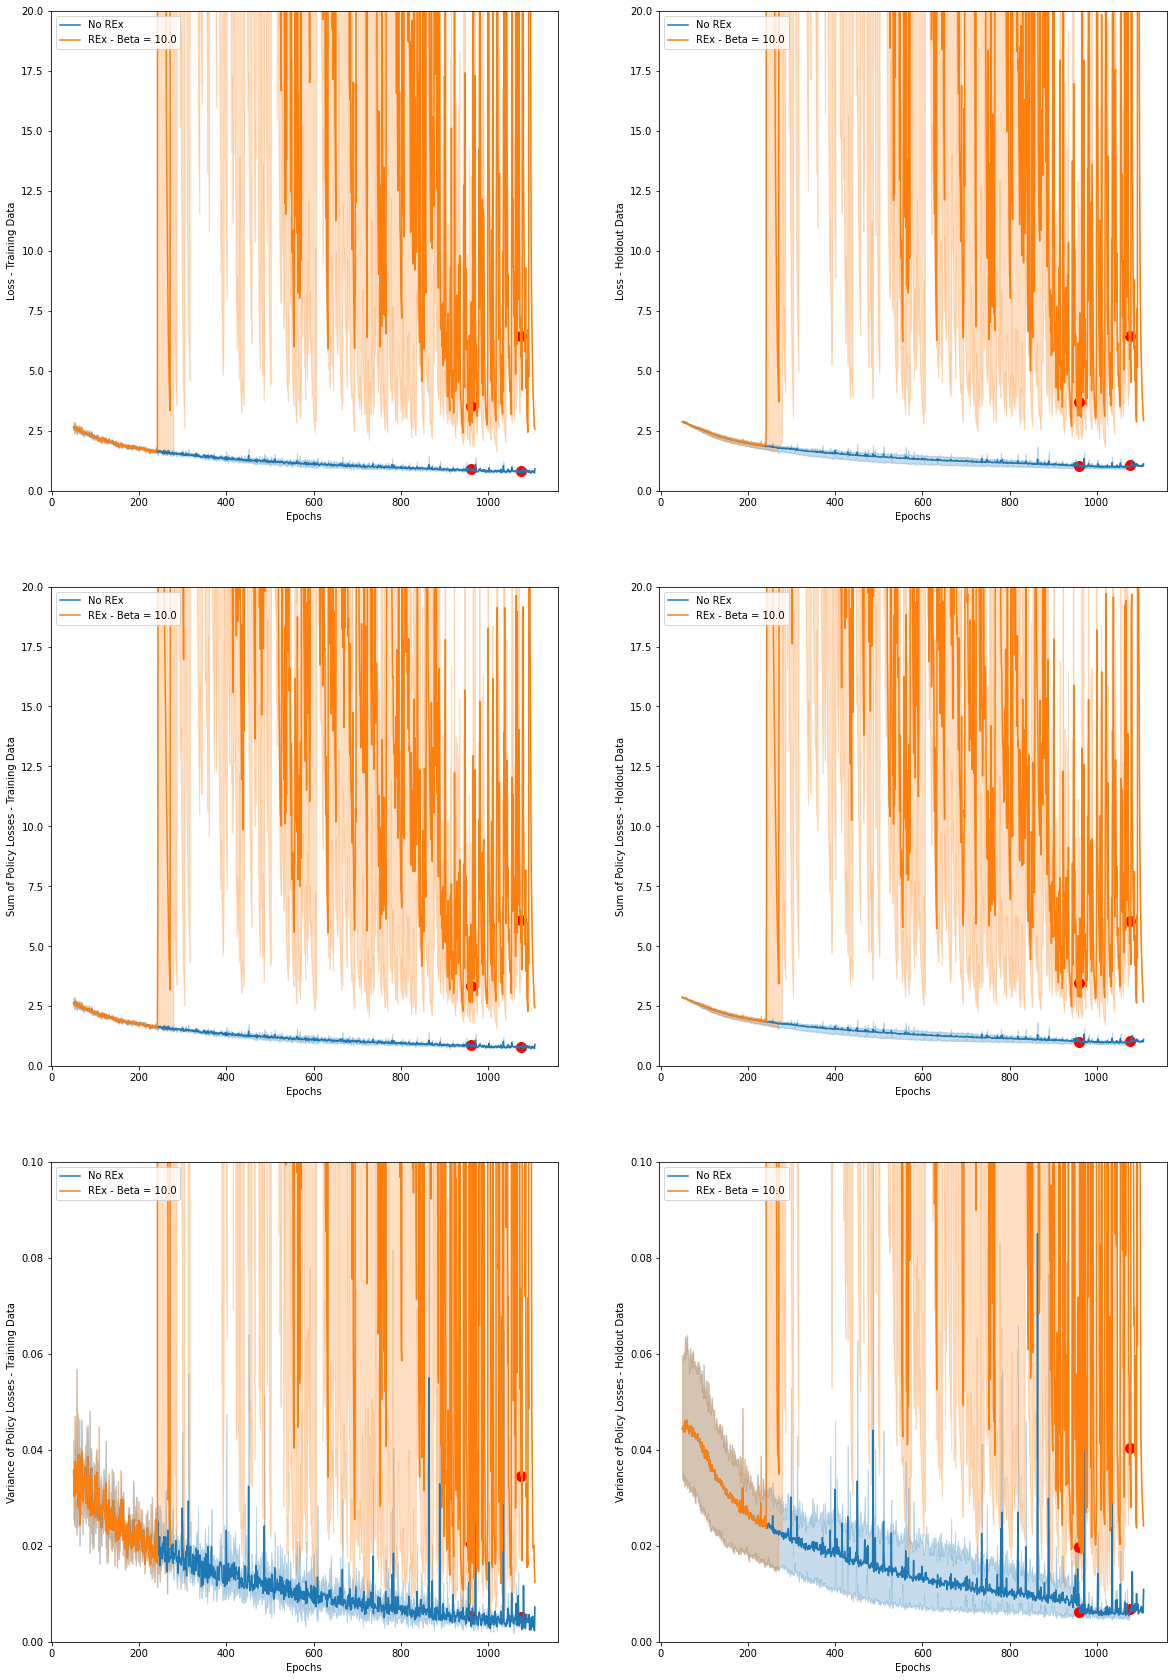

In [23]:
plot_experiment_metrics(
    [
        ('model_loss_history',                   'Loss - Training Data',                      (0,20.0)),
        ('model_holdout_loss_history',           'Loss - Holdout Data',                       (0,20.0)),
        ('model_pol_total_loss_history',         'Sum of Policy Losses - Training Data',      (0,20.0)),
        ('model_holdout_pol_total_loss_history', 'Sum of Policy Losses - Holdout Data',       (0,20.0)),
        ('model_pol_var_loss_history',           'Variance of Policy Losses - Training Data', (0,0.1)),
        ('model_holdout_pol_var_loss_history',   'Variance of Policy Losses - Holdout Data',  (0,0.1)),
    ],
    [[
        ((MP329, MP330, MP331), 'No REx'),
        # ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
        # ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
        # ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
        ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
    ]],
    (3,2)
)

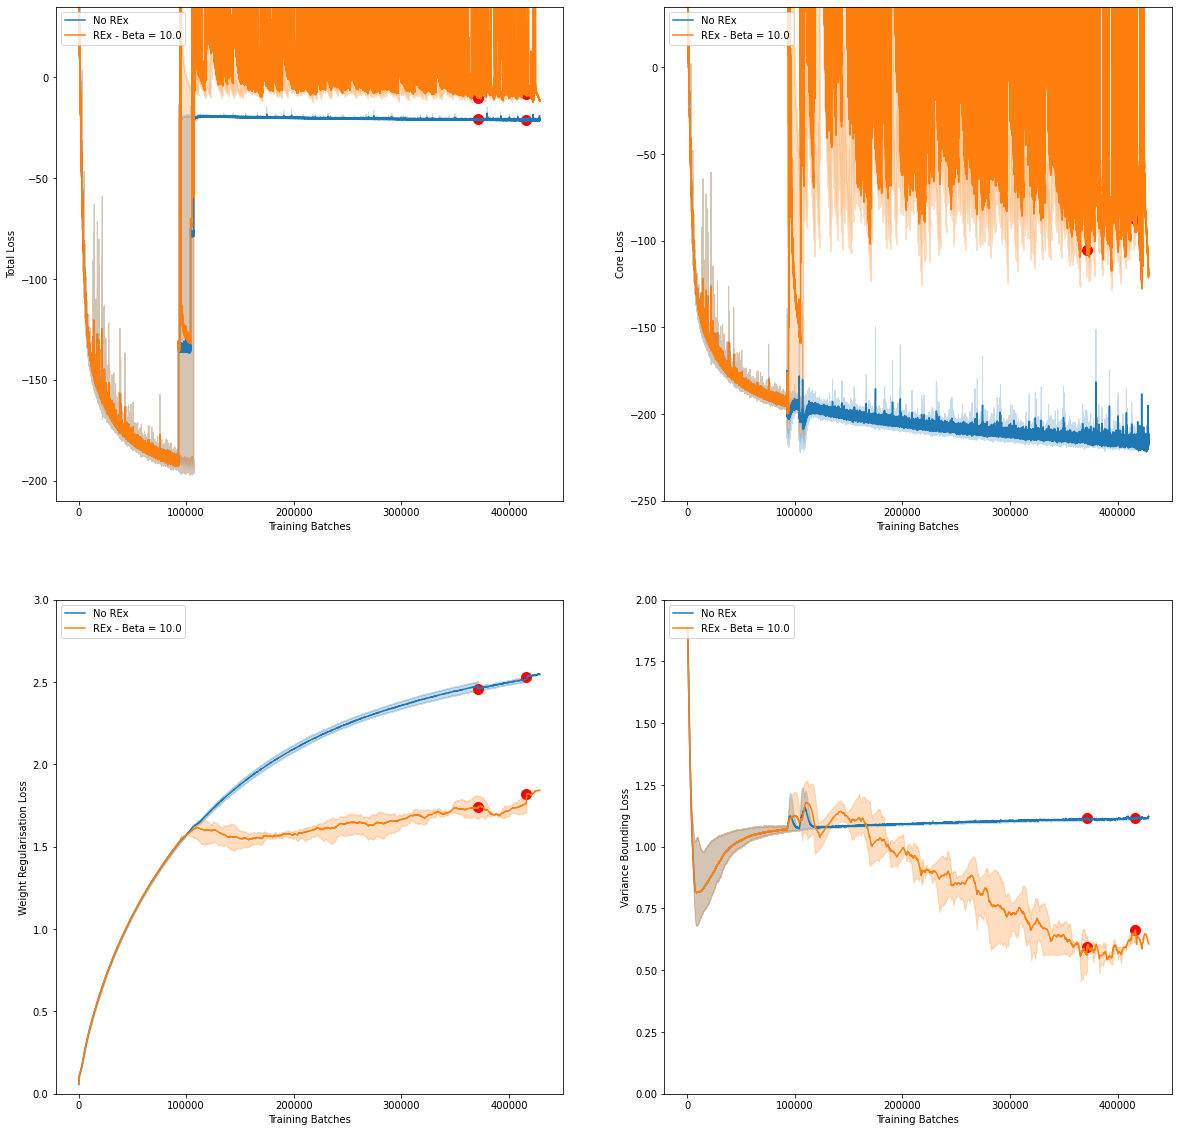

In [24]:
plot_experiment_metrics(
    [
        ('model_train_loss_history',           'Total Loss',                 (-210,35)),
        ('model_train_core_loss_history',      'Core Loss',                  (-250,35)),
        # ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
        # ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,2)),
        ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,3.0)),
        ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
    ],
    [[
        ((MP329, MP330, MP331), 'No REx'),
        # ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
        # ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
        # ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
        ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
    ]],
    (2,2),
    x_label='Training Batches',
)

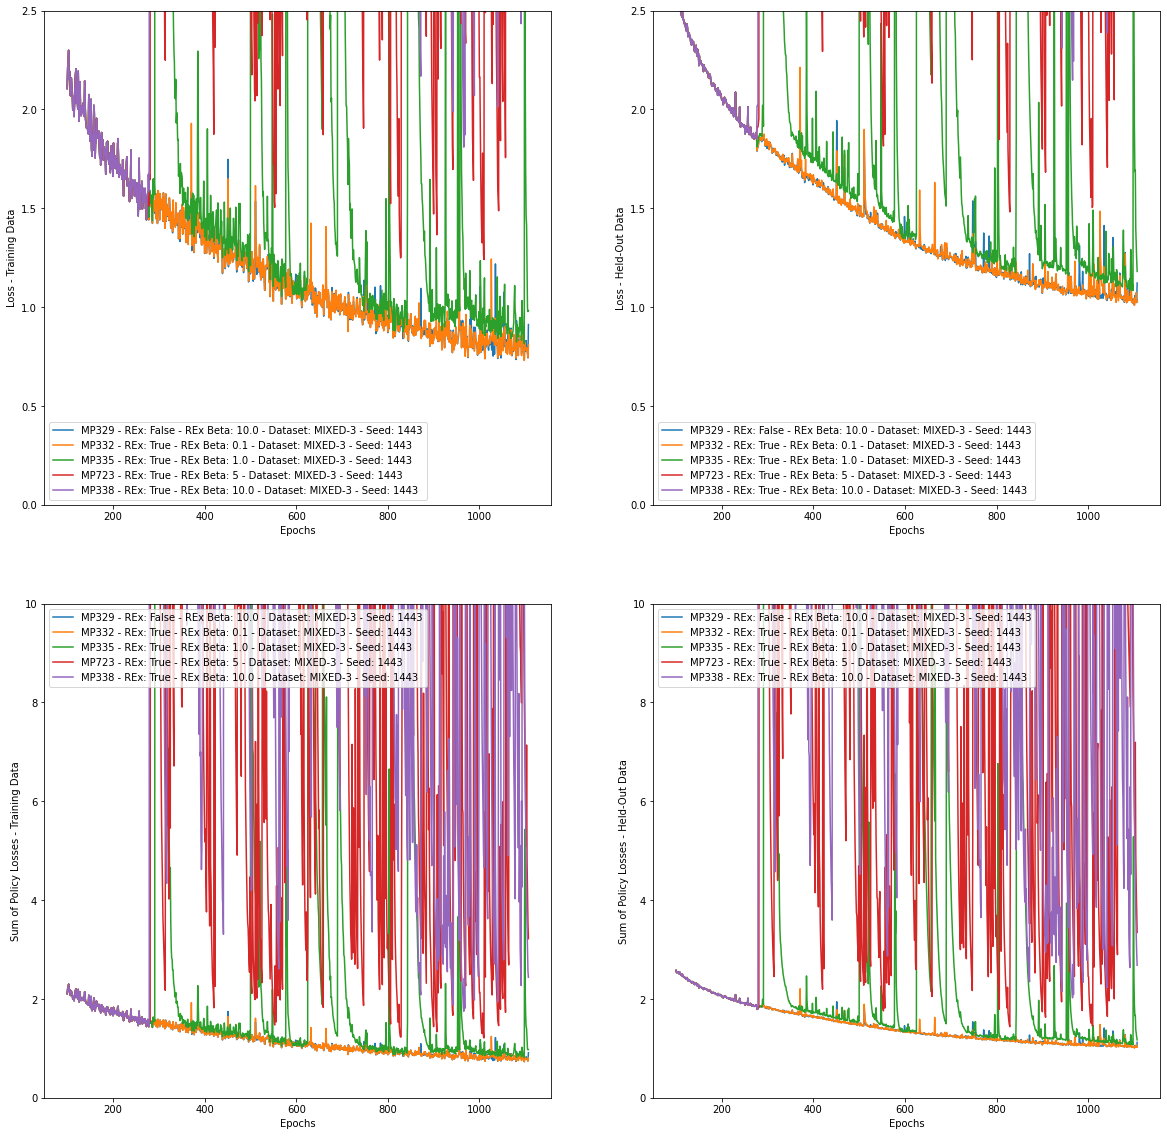

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP723,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

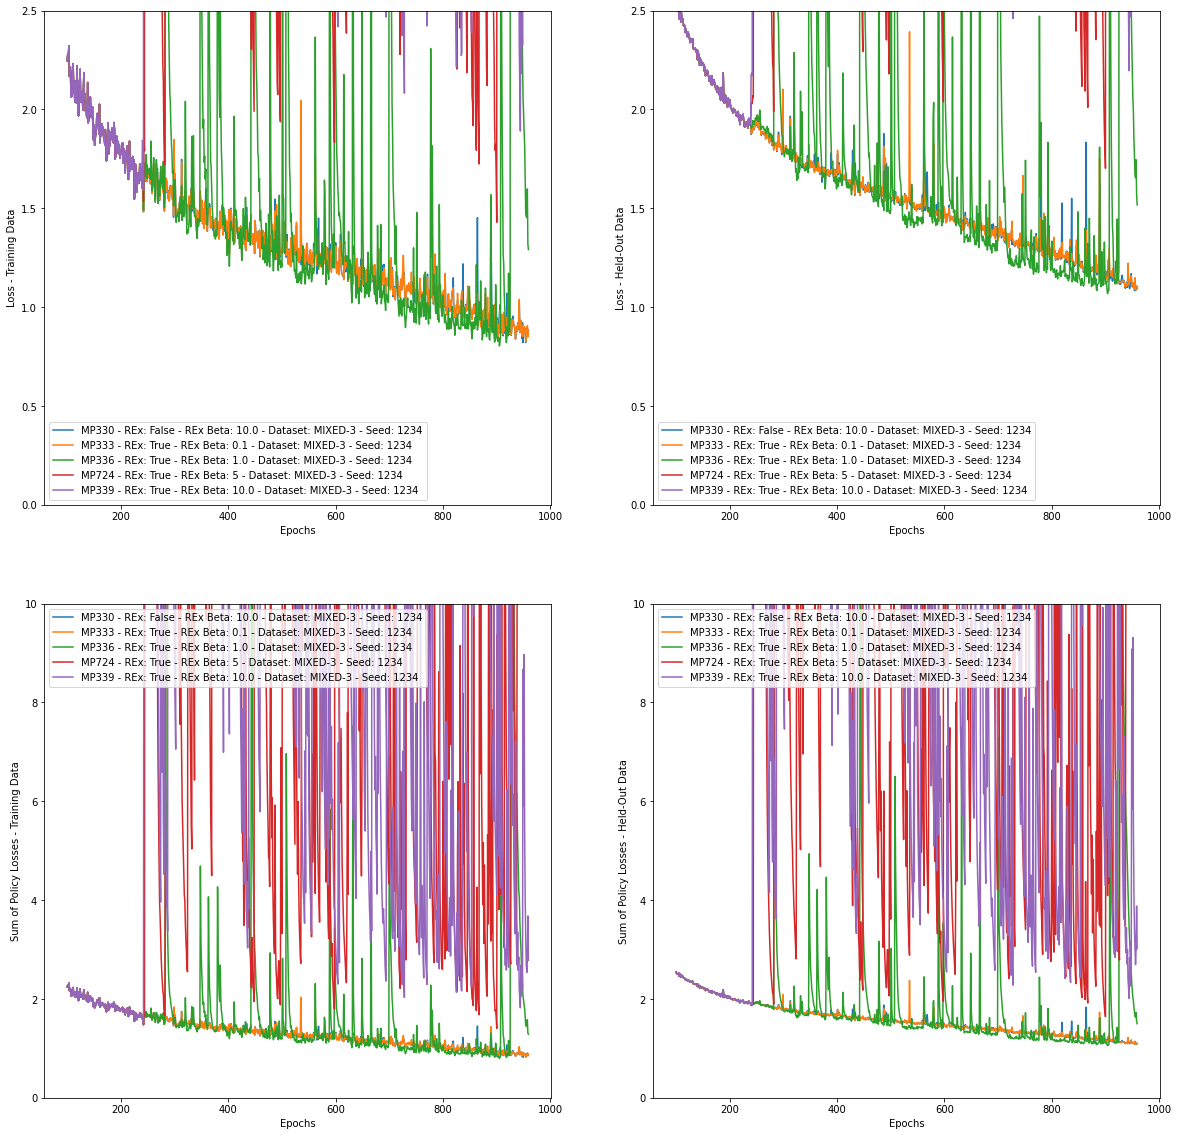

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP724,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

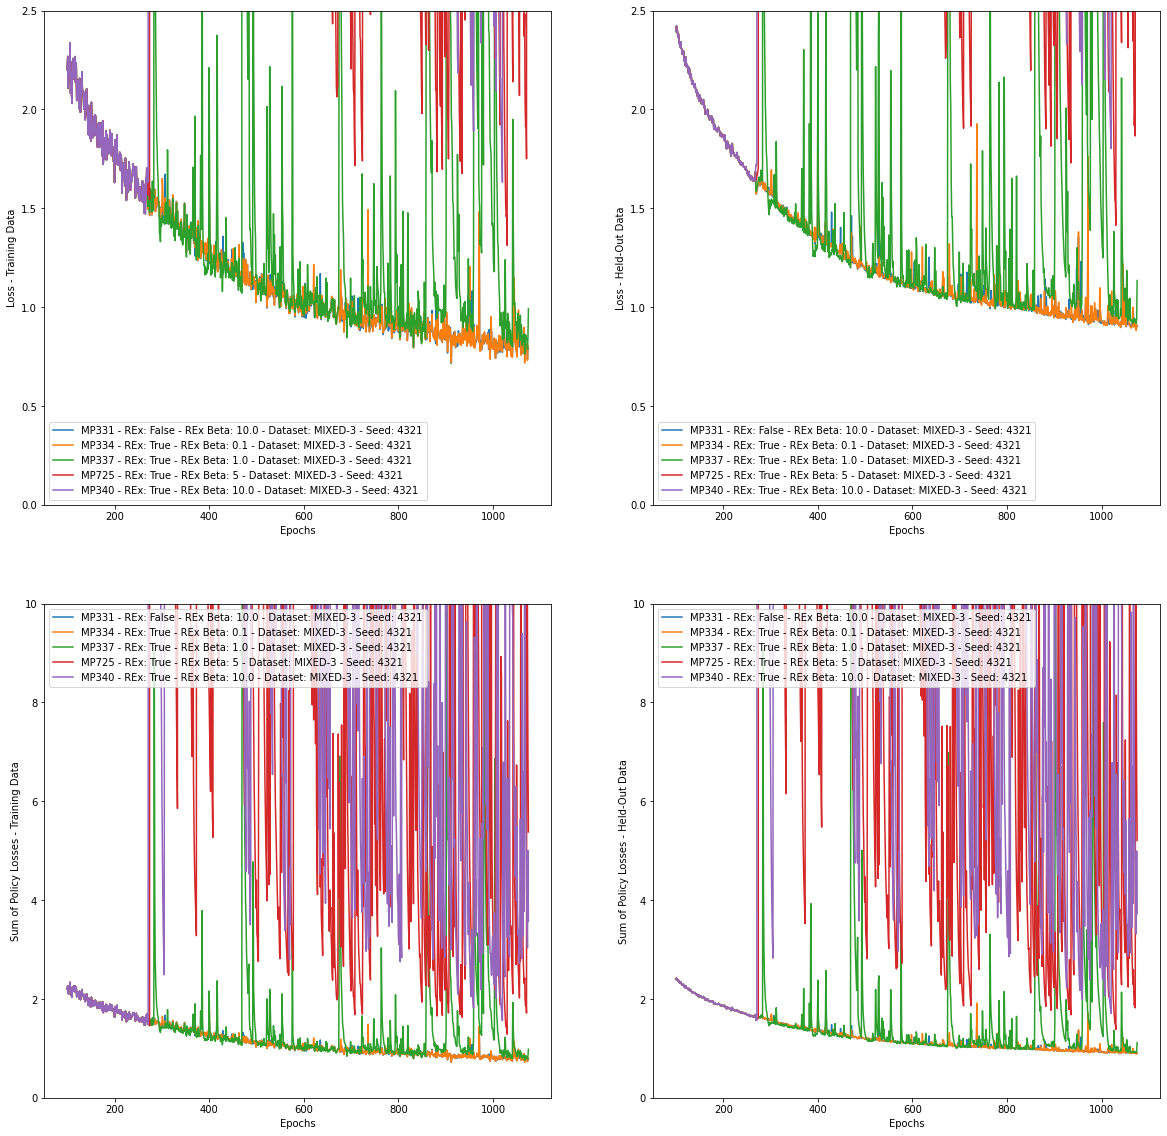

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP725,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

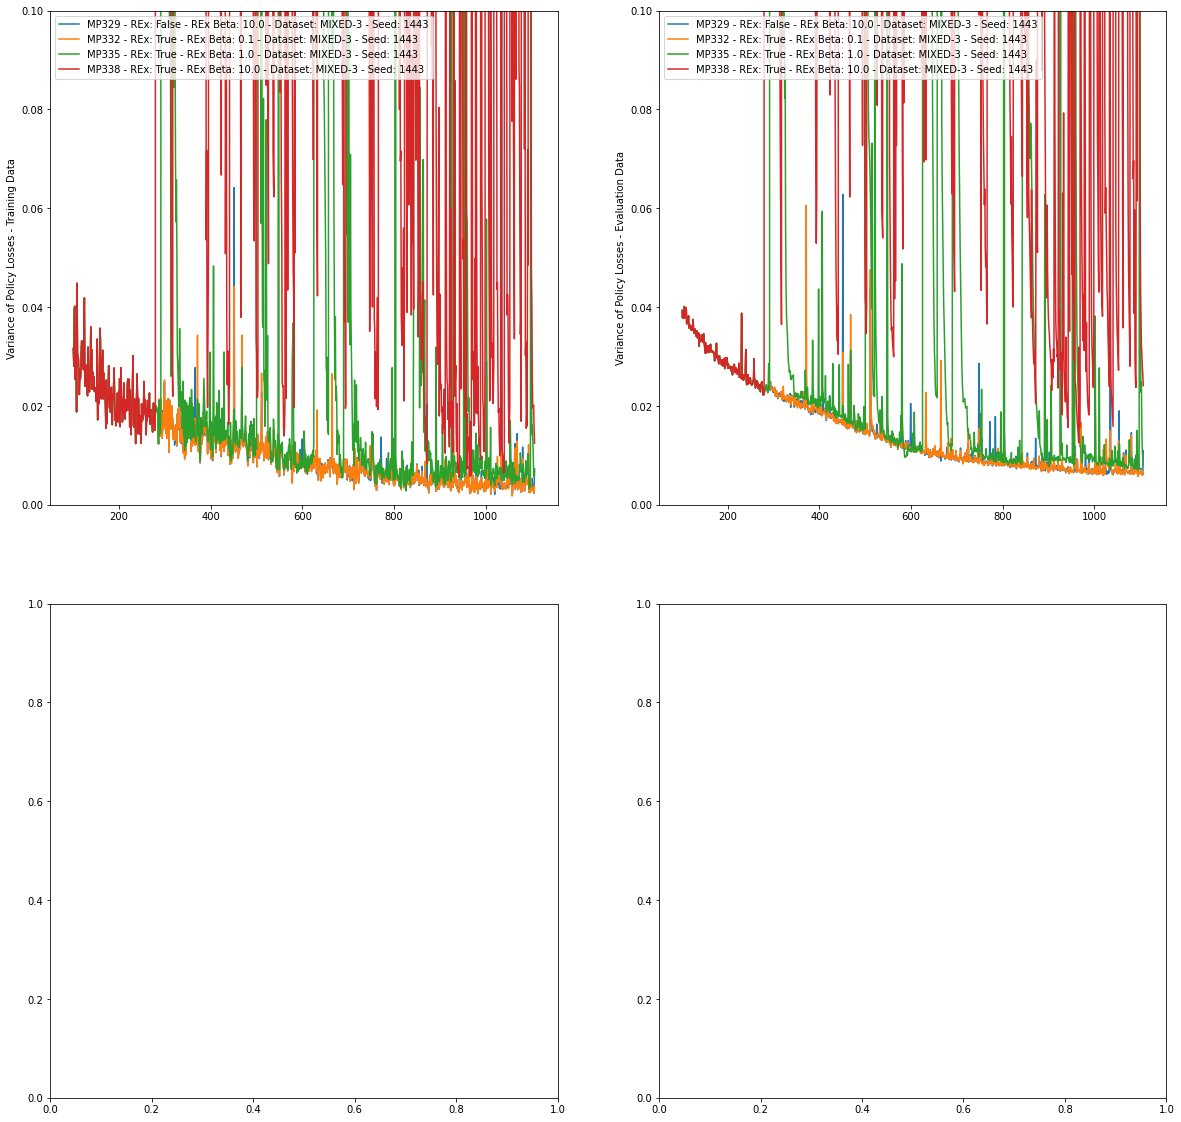

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP329, None), # MP329_details),
    (MP332, None), # MP332_details),
    (MP335, None), # MP335_details),
    (MP338, None), # MP338_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

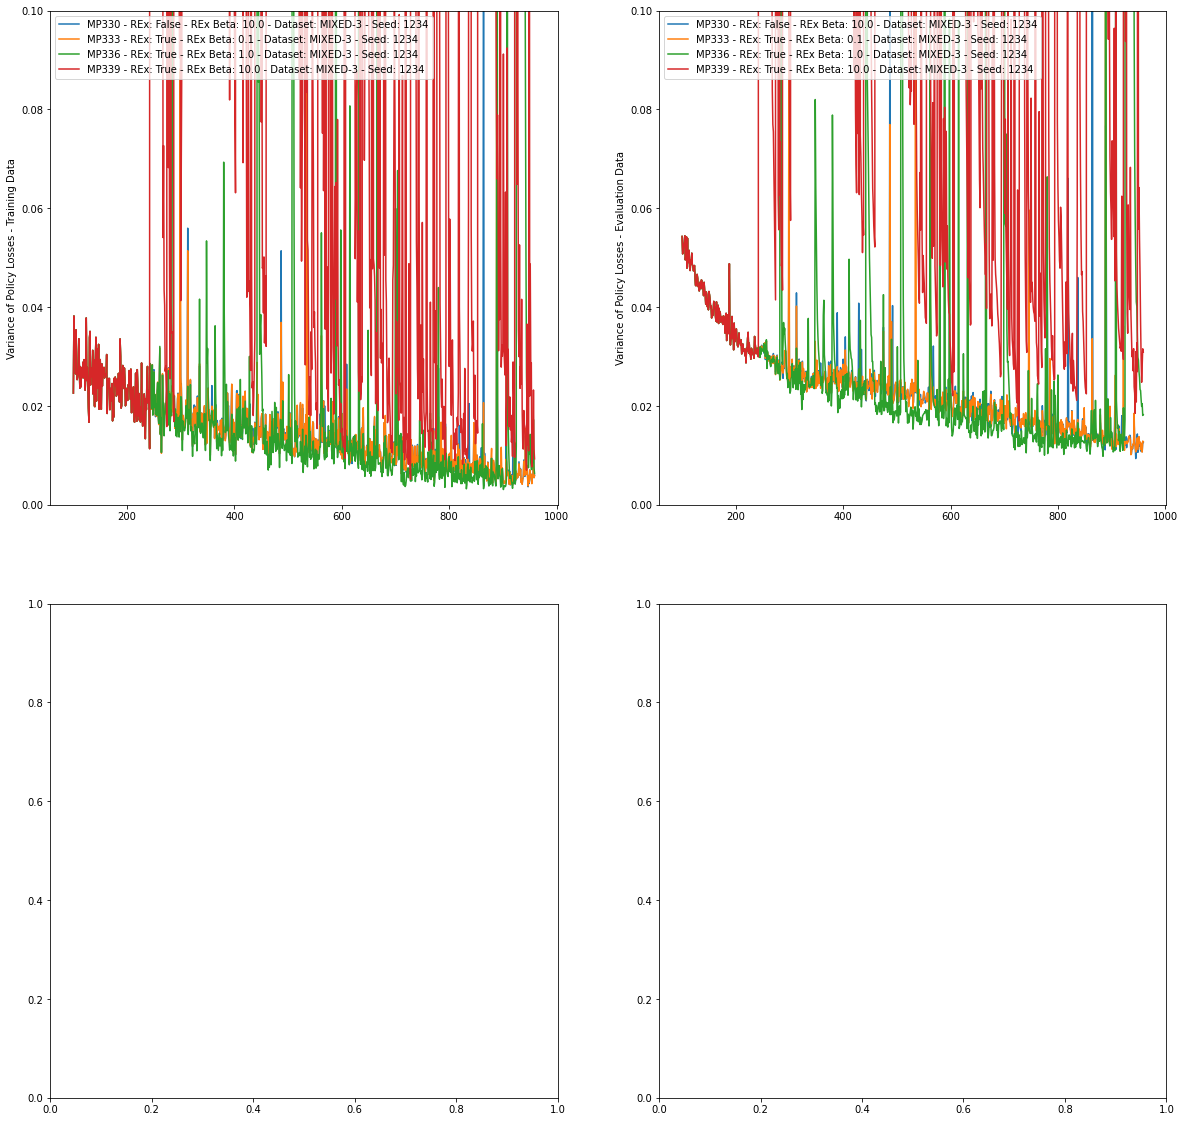

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP330, None), # MP330_details),
    (MP333, None), # MP333_details),
    (MP336, None), # MP336_details),
    (MP339, None), # MP339_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

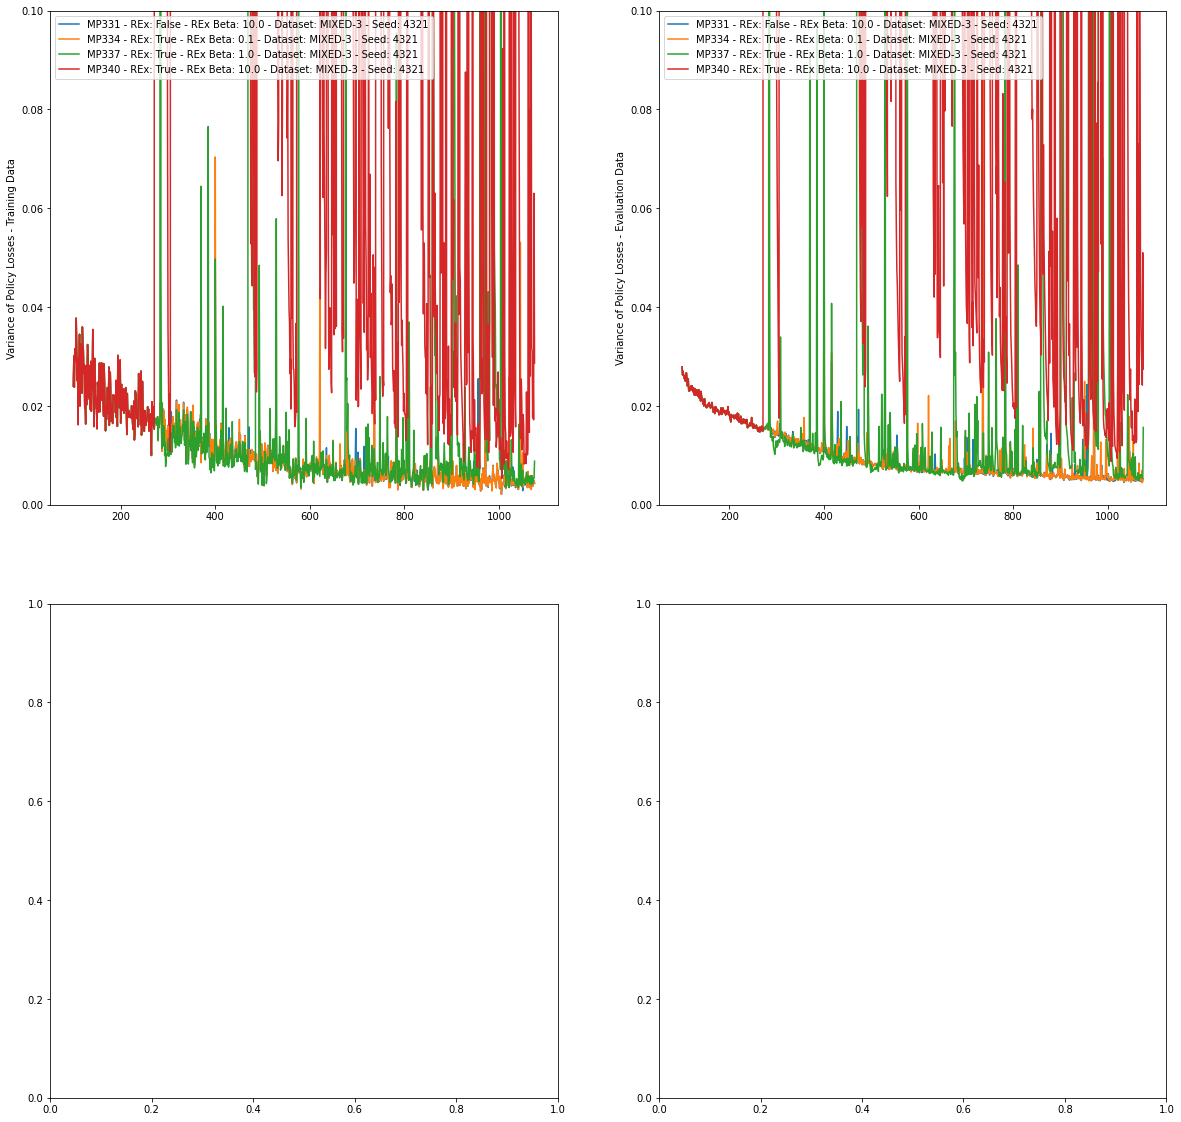

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP331, None), # MP331_details),
    (MP334, None), # MP334_details),
    (MP337, None), # MP337_details),
    (MP340, None), # MP340_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

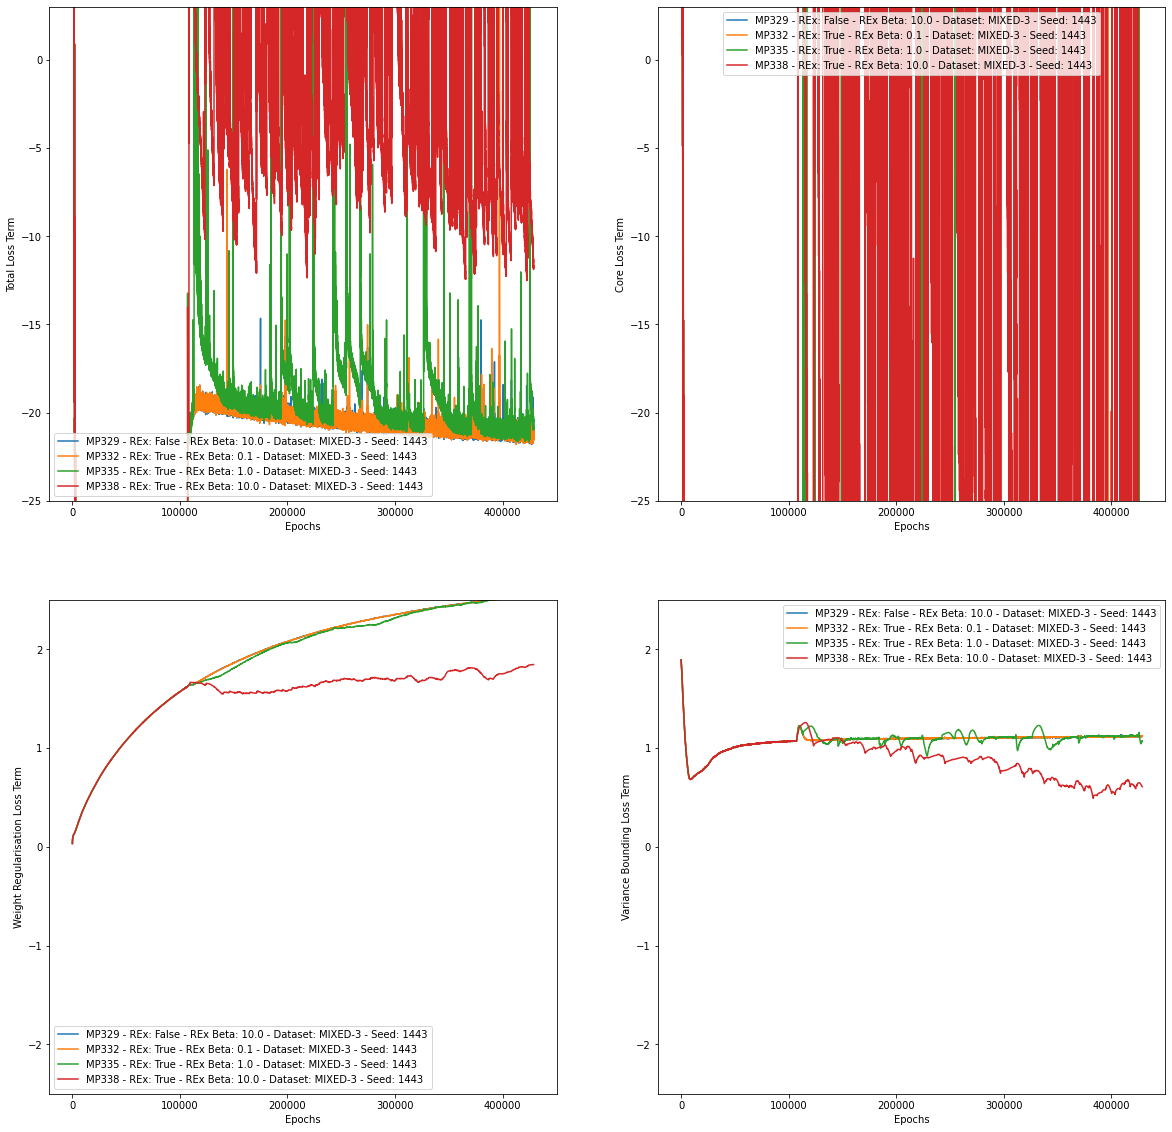

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

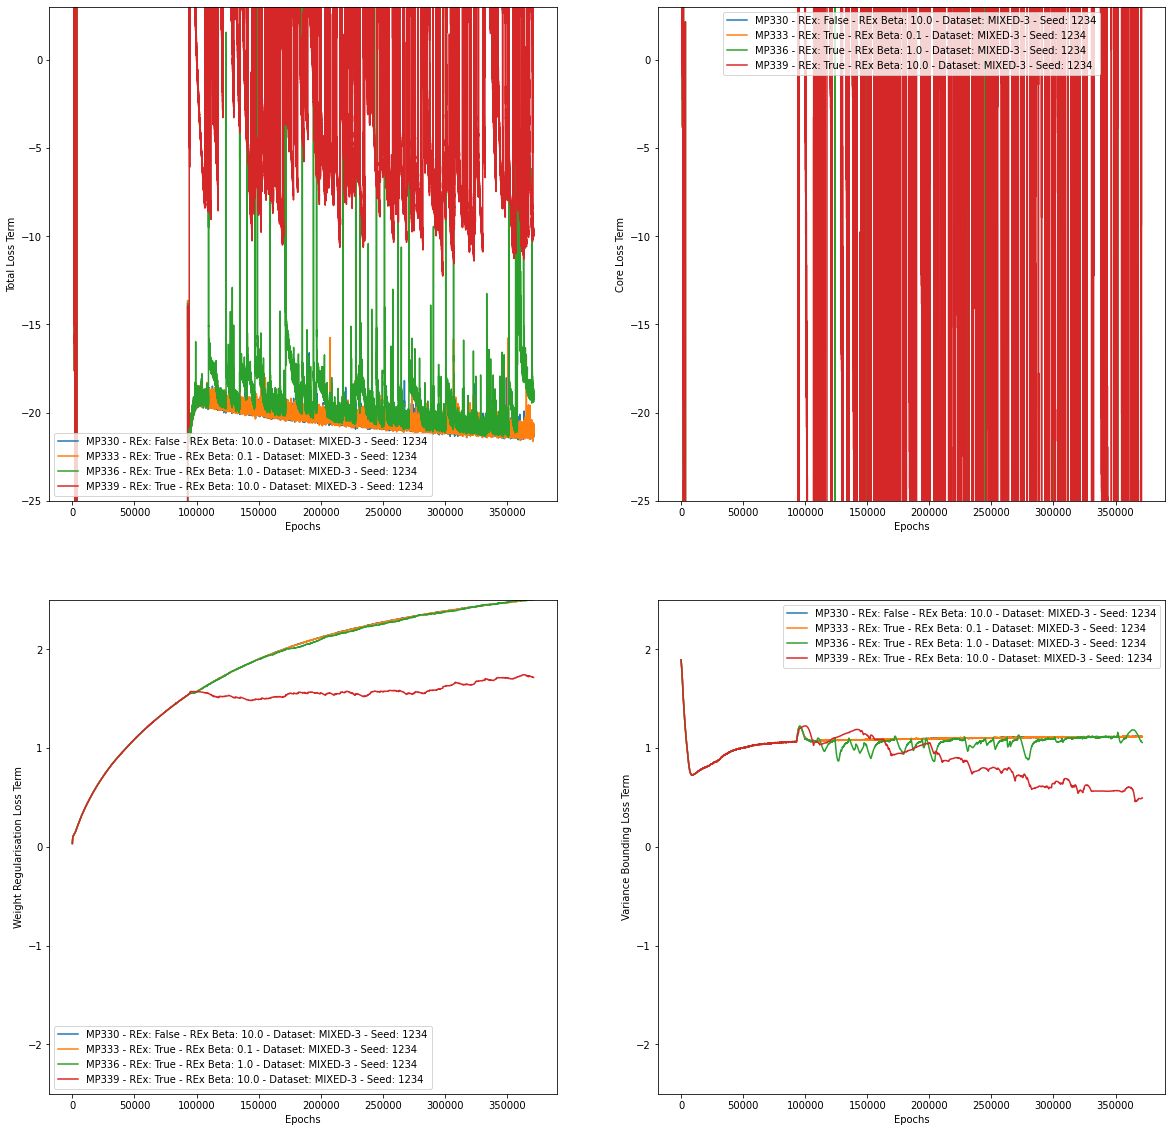

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

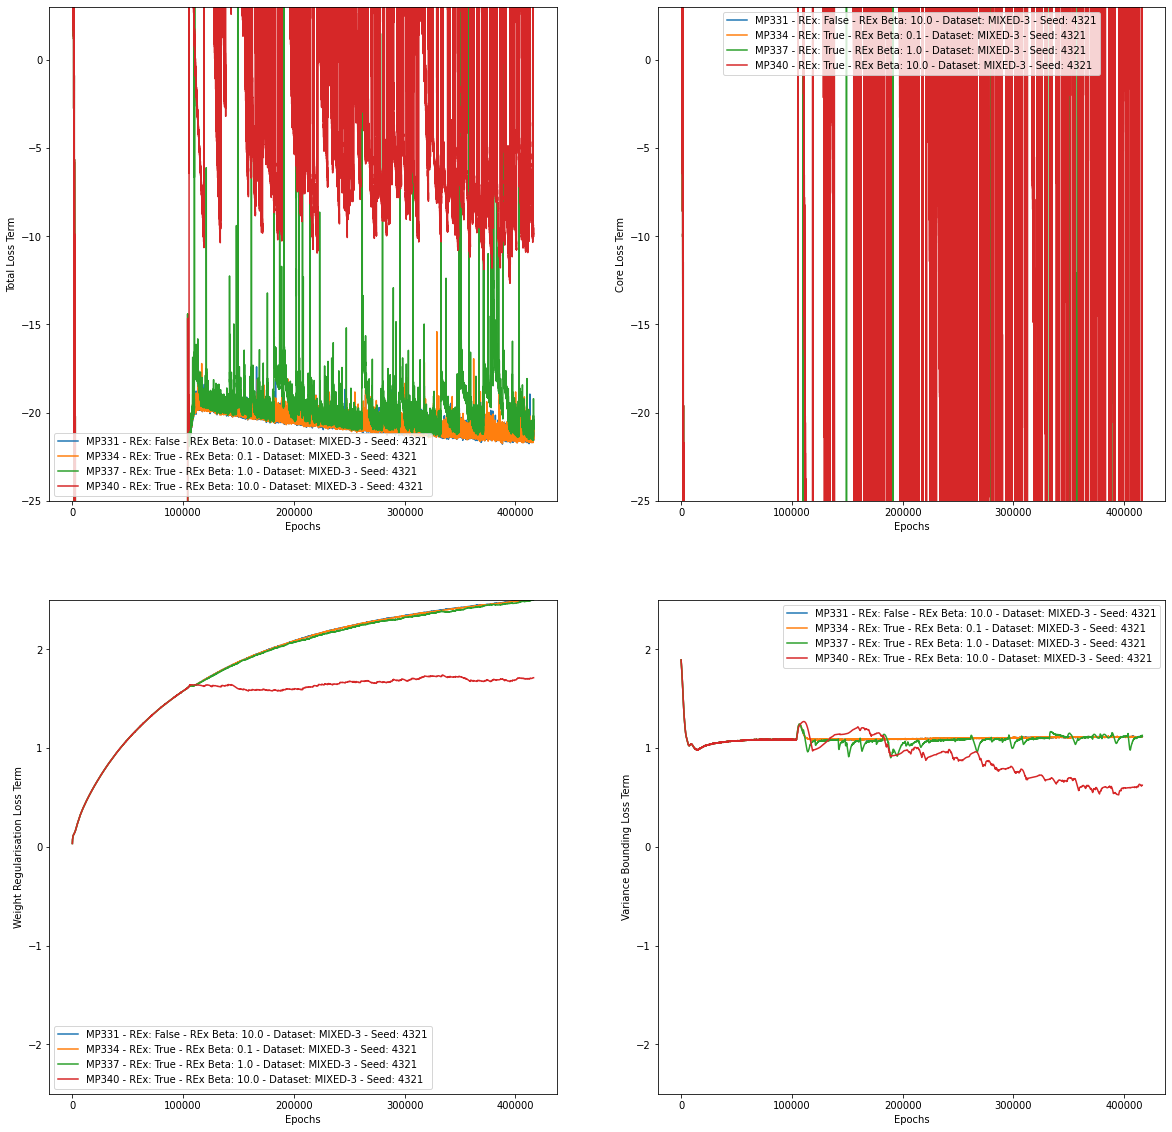

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

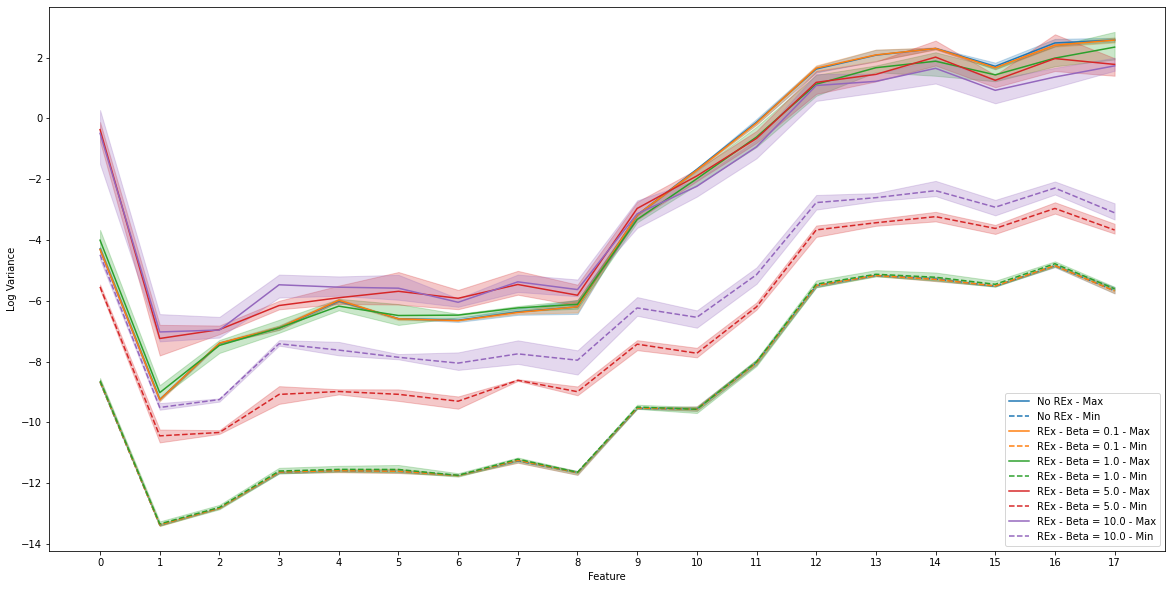

In [16]:
plot_min_max_logvars([
    ((MP329, MP330, MP331), 'No REx'),
    ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

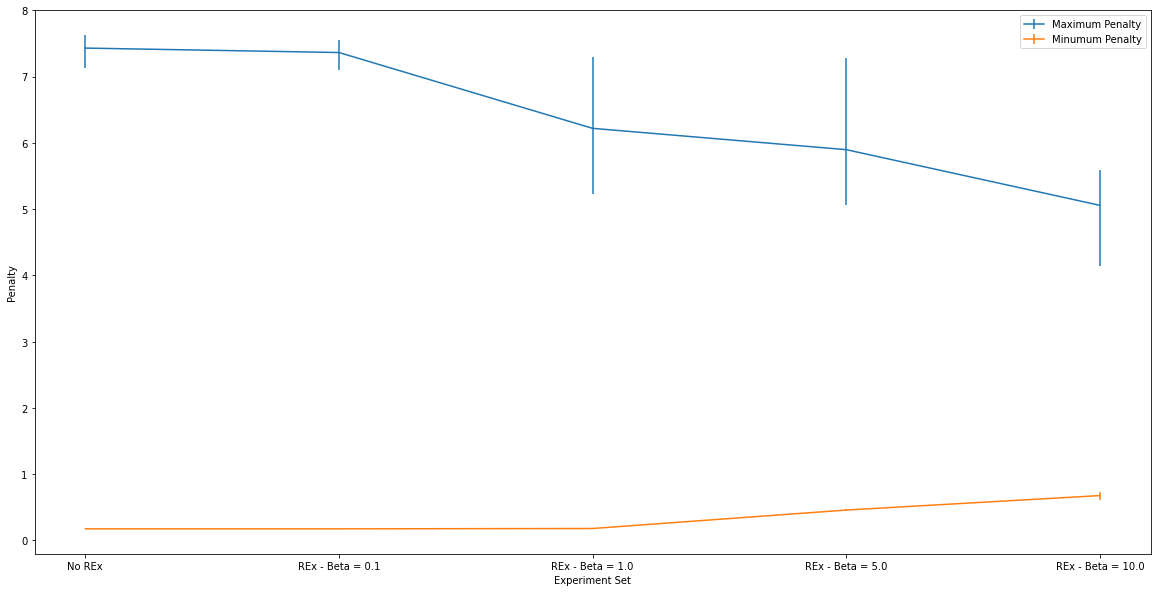

In [17]:
plot_min_max_penalty([
    ((MP329, MP330, MP331), 'No REx'),
    ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

# Additional Seeds

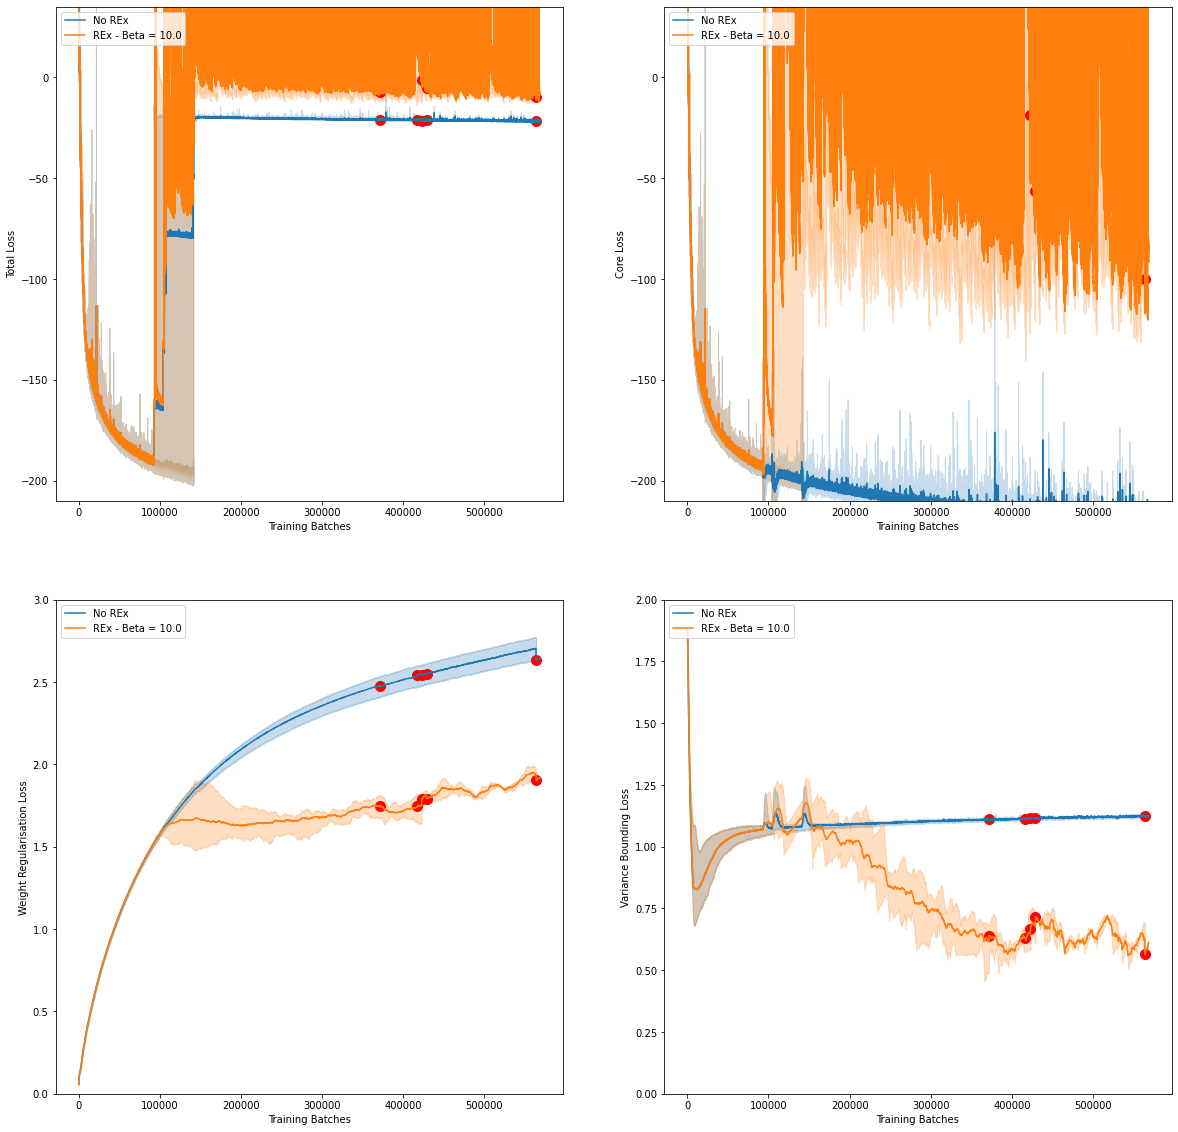

In [ ]:
plot_experiment_metrics(
    [
        ('model_train_loss_history',           'Total Loss',                 (-210,35)),
        ('model_train_core_loss_history',      'Core Loss',                  (-210,35)),
        # ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
        # ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,2)),
        ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,3.0)),
        ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
    ],
    [[
        ((MP329, MP330, MP331, MQ016, MQ017, MQ018), 'No REx'),
        # ((MP332, MP333, MP334, MQ019, MQ020, MQ021), 'REx - Beta = 0.1'),
        # ((MP335, MP336, MP337, MQ022, MQ023, MQ024), 'REx - Beta = 1.0'),
        # ((MP723, MP724, MP725, MQ025, MQ026, MQ027), 'REx - Beta = 5.0'),
        ((MP338, MP339, MP340, MQ028, MQ029, MQ030), 'REx - Beta = 10.0'),
    ]],
    (2,2),
    x_label='Training Batches',
)